In [12]:
import gensim

In [13]:
import nltk
nltk.download('punkt')
import stop_words
import pandas as pd 
import numpy as np

[nltk_data] Downloading package punkt to /Users/shreya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
from gensim import corpora, models, similarities
from stop_words import get_stop_words
en_stop = get_stop_words('en')

In [15]:
!pip install lda
import lda

In [16]:
import matplotlib.pyplot as plt 

In [17]:
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

tokenizer = RegexpTokenizer(r'\w+')
stemmer=  SnowballStemmer("english")


In [18]:
from gensim import corpora, models

In [19]:
!pip install PyPDF2

In [21]:
#importing the report  
import PyPDF2 
pdfFileObj = open('MPC_first.pdf', 'rb') 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)   
# printing number of pages in pdf file 
num = (pdfReader.numPages) 
  
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

In [22]:
# splitting the report into pages 
doc_set= [pdfReader.getPage(k).extractText() for k in range(num) ]
for k in range(num):
    doc_set[k]=doc_set[k].replace('\n',"")
    doc_set[k]=sent_detector.tokenize(doc_set[k].strip())

In [23]:
# splitting the document into sentences 
doc_set=[item for k in range(num) for item in doc_set[k]]
# doc_set now contains each sentence of a report as a document 

In [24]:
len(doc_set)

378

In [25]:

#using the tokenizer and stemmer and stopped tokens 
texts=[]
for i in doc_set:
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    #stem tokens
    stemmed_tokens = [stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stopped_tokens)


In [26]:
type(tokens)

list

In [27]:
len(tokens)

11

In [28]:
len(texts)

378

In [29]:


dictionary = corpora.Dictionary(texts)


In [30]:
len(dictionary)

1436

In [31]:
corpus = [dictionary.doc2bow(text) for text in texts]


In [32]:
type(corpus)

list

In [33]:
len(corpus)

378

In [34]:
# training the model 
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=15, id2word = dictionary, passes=200)

In [41]:
f=open('topics.txt',"w")
for k in range(15):
    print(ldamodel.print_topics()[k][1])
    print('/n')
    f.write(ldamodel.print_topics()[k][1] )
    f.write('/n')
    

0.018*"therefore" + 0.013*"year" + 0.013*"economic" + 0.013*"10" + 0.013*"maintaining" + 0.010*"also" + 0.010*"inflation" + 0.009*"data" + 0.009*"growth" + 0.009*"decelerated"
/n
0.012*"impact" + 0.011*"growth" + 0.010*"also" + 0.010*"will" + 0.010*"euro" + 0.010*"area" + 0.010*"unchanged" + 0.007*"cent" + 0.007*"per" + 0.007*"ﬁshock"
/n
0.044*"growth" + 0.020*"exports" + 0.019*"œ" + 0.016*"net" + 0.012*"december" + 0.009*"economic" + 0.009*"days" + 0.009*"prices" + 0.009*"4" + 0.009*"imports"
/n
0.030*"inflation" + 0.021*"per" + 0.016*"cent" + 0.014*"prices" + 0.014*"oil" + 0.013*"also" + 0.011*"food" + 0.009*"rate" + 0.009*"lower" + 0.007*"bank"
/n
0.048*"cent" + 0.048*"per" + 0.031*"inflation" + 0.030*"7" + 0.025*"4" + 0.021*"2" + 0.017*"3" + 0.017*"20" + 0.017*"2019" + 0.015*"projected"
/n
0.022*"inflation" + 0.015*"prices" + 0.012*"domestic" + 0.011*"outlook" + 0.011*"also" + 0.009*"data" + 0.009*"oil" + 0.009*"october" + 0.009*"mainly" + 0.008*"time"
/n
0.035*"inflation" + 0.022*

In [ ]:
# creating a document to get the document- topic distribution 
my_doc=pdfReader.getPage(2).extractText()
my_doc=dictionary.doc2bow(tokenizer.tokenize(my_doc))

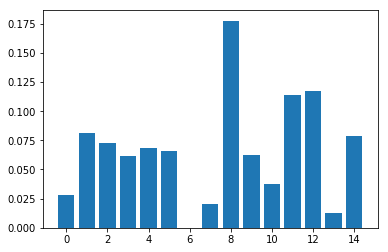

In [43]:
# checking what is the topic distribution for our document 
data=ldamodel.get_document_topics(my_doc)
x=range(15)
y_val=np.zeros(15)
for item in data:
    y_val[item[0]]=item[1]

plt.bar(x,y_val)
plt.show()